<a href="https://colab.research.google.com/github/veeruamma/Face-Biometrics/blob/main/Face_Verification_using_VGGFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mtcnn # to detect faces
!pip install keras_vggface keras_applications # pretrained model for face feature exatraction trained over 3.3 M images of 9000 famous celebrities

In [3]:
!mkdir -p ~/.kaggle #home directory

In [5]:
cd /content/drive/MyDrive/LEARNING/Face Biometrics/

/content/drive/MyDrive/LEARNING/Face Biometrics


In [7]:
!cp kaggle.json ~/.kaggle/ #copyting the kaggale.json 
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json #giving permission

kaggle.json


In [11]:
!kaggle datasets list -s faces #listing all the datasets from kaggle which have faces in it

ref                                              title                                      size  lastUpdated          downloadCount  
-----------------------------------------------  ----------------------------------------  -----  -------------------  -------------  
kostastokis/simpsons-faces                       Simpsons Faces                            442MB  2018-09-28 17:38:04           5193  
soumikrakshit/anime-faces                        Anime Faces                               441MB  2019-05-16 10:38:47           4152  
andrewmvd/animal-faces                           Animal Faces                              696MB  2020-05-22 06:49:01           1428  
ashwingupta3012/human-faces                      Human Faces                                 2GB  2020-09-21 04:09:12            979  
selfishgene/youtube-faces-with-facial-keypoints  YouTube Faces With Facial Keypoints          0B  2020-05-25 22:53:33           7276  
dansbecker/5-celebrity-faces-dataset             5 Cele

In [12]:
!kaggle datasets download -d dansbecker/5-celebrity-faces-dataset

  0% 0.00/5.03M [00:00<?, ?B/s]
100% 5.03M/5.03M [00:00<00:00, 46.2MB/s]


In [17]:
!ls

 5-celebrity-faces-dataset.zip
 data
 dataset
'Face Detection using MTCNN Python.ipynb'
'Face Verification using VGGFace.ipynb'
 kaggle.json
 train
 val


In [19]:
!unzip 5-celebrity-faces-dataset.zip -d 5-celebrity-faces-dataset/

Archive:  5-celebrity-faces-dataset.zip
  inflating: 5-celebrity-faces-dataset/data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg  
  inflating: 5-celebrity-faces-dataset/data/train/ben_afflek/httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg  
  inflating: 5-celebrity-faces-dataset/data/train/ben_afflek/httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg  
  inflating: 5-celebrity-faces-dataset/data/train/ben_afflek/httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg  
  inflating: 5-celebrity-faces-dataset/data/train/ben_afflek/httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg  
  inflating: 5-celebrity-faces-dataset/data/train/ben_afflek/httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg  
  inflating: 5-celebrity-faces-dataset/data/train/ben_afflek/httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg  
  inflating: 5-celebrity-faces-dataset/data/train/ben_afflek/httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGage

In [16]:
from mtcnn.mtcnn import MTCNN

import cv2
import numpy as np
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine

import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

In [20]:
image = cv2.imread('5-celebrity-faces-dataset/data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg')

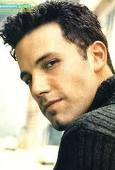

In [21]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [22]:
detector = MTCNN()
faces = detector.detect_faces(image)

In [23]:
for face in faces:
  print(face)

{'box': [20, 35, 70, 88], 'confidence': 0.9996923208236694, 'keypoints': {'left_eye': (29, 73), 'right_eye': (54, 63), 'nose': (37, 90), 'mouth_left': (42, 108), 'mouth_right': (63, 100)}}


In [24]:
def create_bbox(image):
  faces = detector.detect_faces(image)
  bounding_box = faces[0]['box']

  cv2.rectangle(image,
                (bounding_box[0], bounding_box[1]),
                (bounding_box[0]+bounding_box[2], bounding_box[1]+bounding_box[3]),
                 (0, 155,255),2)
  return image


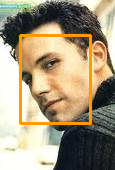

In [25]:
cv2_imshow(create_bbox(image))

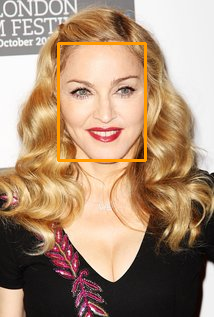

In [28]:
marked_image = create_bbox(cv2.imread('5-celebrity-faces-dataset/data/train/madonna/httpiamediaimdbcomimagesMMVBMTANDQNTAxNDVeQTJeQWpwZBbWUMDIMjQOTYVUXCRALjpg.jpg'))
cv2_imshow(marked_image)

In [32]:
def extract_face(image, resize=(224, 224)):
  image = cv2.imread(image)
  faces = detector.detect_faces(image)
  x1, y1, width, height = faces[0]['box']
  x2, y2 = x1+width, y1+height

  print(x1, y1, x2, y2)

  face_boundary = image[y1:y2, x1:x2]
  face_image = cv2.resize(face_boundary, resize)

  return face_image

58 43 145 160


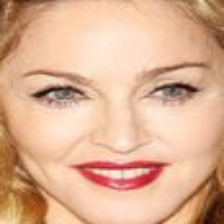

In [33]:
face_image = extract_face('5-celebrity-faces-dataset/data/train/madonna/httpiamediaimdbcomimagesMMVBMTANDQNTAxNDVeQTJeQWpwZBbWUMDIMjQOTYVUXCRALjpg.jpg')
cv2_imshow(face_image)

67 60 118 134


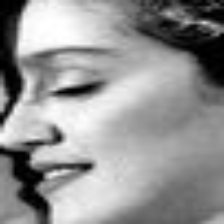

In [35]:
face_image = extract_face('5-celebrity-faces-dataset/data/train/madonna/httpssmediacacheakpinimgcomxffeabacaaejpg.jpg')
cv2_imshow(face_image)

80 67 182 199


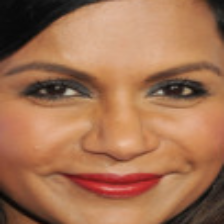

In [36]:
face_image = extract_face('5-celebrity-faces-dataset/data/train/mindy_kaling/httppixelnymagcomimgsfashiondailymindykalingwhjpg.jpg')
cv2_imshow(face_image)

In [38]:
def get_embeddigns(faces):
  face = np.asarray(faces, 'float32')
  face = preprocess_input(face, version=2)

  model = VGGFace(model='resnet50', include_top=False, input_shape=(224,224,3), pooling='avg')

  return model.predict(face)

In [46]:
def get_similarity(faces):
  embeddings = get_embeddigns(faces)
  score = cosine(embeddings[0], embeddings[1])

  if score <= 0.53:
    return "Face Matched", score
  else:
    return "Faces are not matched", score

In [49]:
faces = [extract_face(image) for image in ['5-celebrity-faces-dataset/data/train/madonna/httpssmediacacheakpinimgcomxffeabacaaejpg.jpg',
                                           '5-celebrity-faces-dataset/data/train/mindy_kaling/httppixelnymagcomimgsfashiondailymindykalingwhjpg.jpg']]

67 60 118 134
80 67 182 199


In [50]:
get_similarity(faces)

('Faces are not matched', 0.73710897564888)